<a href="https://colab.research.google.com/github/shrutisaumya05/CNN-model-for-predicting-atmospheric-rivers-ad-tropical-cyclone-in-Orissa-India/blob/main/final_dmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install xarray and netCDF4
!pip install xarray netcdf4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import xarray as xr
import concurrent.futures

# URL containing the directory with NetCDF files
url = "https://portal.nersc.gov/project/ClimateNet/climatenet_new/train/"

# Use a session for HTTP requests
with requests.Session() as session:
    response = session.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        links = soup.find_all('a')

        # Filter out links ending with '.nc' (NetCDF files)
        file_links = [link.get('href') for link in links if link.get('href').endswith('.nc')]

        # Count the number of files in the URL
        num_files_in_url = len(file_links)

        # Define a function to download files
        def download_file(file_link):
            filename = os.path.basename(file_link)
            with open(filename, 'wb') as f:
                f.write(session.get(url + file_link).content)
            return filename

        # Download files in parallel
        with concurrent.futures.ThreadPoolExecutor() as executor:
            downloaded_files = list(executor.map(download_file, file_links))

# Count the number of files successfully downloaded
num_files_downloaded = len(downloaded_files)

# Read all NetCDF files into a single Dataset
ds_train = xr.open_mfdataset(downloaded_files, combine='by_coords', engine='netcdf4', parallel=True)

# Print the results
print(f"Number of files in the URL: {num_files_in_url}")
print(f"Number of files successfully downloaded: {num_files_downloaded}")

# Print the combined dataset
print(ds_train)


Number of files in the URL: 398
Number of files successfully downloaded: 398
<xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 188)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-1996-06-09-01-1.nc' ... 'data-2010-10-29-01-...
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (

In [ ]:
# URL containing the directory with NetCDF files
url = "https://portal.nersc.gov/project/ClimateNet/climatenet_new/test/"

# Use a session for HTTP requests
with requests.Session() as session:
    response = session.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        links = soup.find_all('a')

        # Filter out links ending with '.nc' (NetCDF files)
        file_links = [link.get('href') for link in links if link.get('href').endswith('.nc')]

        # Count the number of files in the URL
        num_files_in_url = len(file_links)

        # Define a function to download files
        def download_file(file_link):
            filename = os.path.basename(file_link)
            with open(filename, 'wb') as f:
                f.write(session.get(url + file_link).content)
            return filename

        # Download files in parallel
        with concurrent.futures.ThreadPoolExecutor() as executor:
            downloaded_files = list(executor.map(download_file, file_links))

# Count the number of files successfully downloaded
num_files_downloaded = len(downloaded_files)

# Read all NetCDF files into a single Dataset
ds_test = xr.open_mfdataset(downloaded_files, combine='by_coords', engine='netcdf4', parallel=True)

# Print the results
print(f"Number of files in the URL: {num_files_in_url}")
print(f"Number of files successfully downloaded: {num_files_downloaded}")

# Print the combined dataset
print(ds_test)

Number of files in the URL: 61
Number of files successfully downloaded: 61
<xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 31)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2011-06-01-01-1.nc' ... 'data-2013-09-27-01-...
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    U850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    V850     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    UBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    VBOT     (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    QREFHT   (time, lat, lon) float32 dask.array<chunksize=(1, 768, 1152), meta=np.ndarray>
    ...       ...
    TS       (tim

In [ ]:
ds_train['TMQ'].shape

(188, 768, 1152)

In [ ]:
ds_test['TMQ'].shape

(31, 768, 1152)

In [ ]:
import numpy as np

def process_data(ds, features):
    lat = ds['lat'].values
    lon = ds['lon'].values
    time = ds['time'].values
    labels = ds['LABELS'].values

    arrays = np.stack([ds[feature].values for feature in features], axis=-1)

    return lat, lon, time, labels, arrays

# For train data
train_features = ['TMQ', 'U850', 'V850', 'PRECT']
train_lat, train_lon, train_time, train_labels, train_arrays = process_data(ds_train, train_features)

# For test data
test_features = ['TMQ', 'U850', 'V850', 'PRECT']
test_lat, test_lon, test_time, test_labels, test_arrays = process_data(ds_test, test_features)

# Expand dimensions to add an extra dimension for the label values
train_labels = np.expand_dims(train_labels, axis=-1)

# Expand dimensions to add an extra dimension for the label values
test_labels = np.expand_dims(test_labels, axis=-1)

In [ ]:
train_arrays.shape

(188, 768, 1152, 4)

In [ ]:
test_arrays.shape

(31, 768, 1152, 4)

In [ ]:
train_labels.shape

(188, 768, 1152, 1)

In [ ]:
test_labels.shape

(31, 768, 1152, 1)

In [ ]:
# Define latitude and longitude ranges for the Orissa region
des_minlat, des_maxlat = 16, 24
des_minlon, des_maxlon = 80, 89

# Find the index ranges for the required latitude and longitude ranges
lat_range = np.where((train_lat >= des_minlat) & (train_lat <= des_maxlat))[0]
lon_range = np.where((train_lon >= des_minlon) & (train_lon <= des_maxlon))[0]

# Ensure the ranges are within the bounds of the data
lat_range = slice(lat_range.min(), lat_range.max() + 1)
lon_range = slice(lon_range.min(), lon_range.max() + 1)

In [ ]:
train_arrays_sliced = train_arrays[:,lat_range, lon_range, : ]
test_arrays_sliced = test_arrays[:,lat_range, lon_range,: ]
train_labels_sliced = train_labels[:, lat_range, lon_range,:]
test_labels_sliced = test_labels[:,lat_range, lon_range,:]

In [ ]:
train_arrays_sliced.shape

(188, 34, 29, 4)

In [ ]:
test_arrays_sliced.shape

(31, 34, 29, 4)

In [ ]:
train_labels_sliced.shape

(188, 34, 29, 1)

In [ ]:
test_labels_sliced.shape

(31, 34, 29, 1)

In [ ]:
len(train_arrays_sliced)

188

In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from keras.utils import to_categorical

def reshape_labels(labels, num_classes):
    # Reshape labels to (batch_size, num_pixels)
    labels_reshaped = np.reshape(labels, (labels.shape[0], -1))

    # One-hot encode the labels
    labels_onehot = to_categorical(labels_reshaped, num_classes=num_classes)

    # Reshape labels_onehot to (batch_size, 986, num_classes) where 986 = 34 * 29
    labels_onehot_reshaped = np.reshape(labels_onehot, (labels_onehot.shape[0], 34, 29, num_classes))

    return labels_onehot_reshaped

# Define the number of classes
num_classes = 3  # BG,TC,AR

# Reshape train labels
train_labels_reshaped = reshape_labels(train_labels_sliced, num_classes)

# Reshape test labels
test_labels_reshaped = reshape_labels(test_labels_sliced, num_classes)


# Define the size of the validation set
training_size = 0.8  # 20% of the train data will be used for validation

# Calculate the number of samples for validation
num_training_samples = int(training_size * len(train_arrays_sliced))

# Split the test data into validation and test sets
training_data = (train_arrays_sliced[:num_training_samples], train_labels_reshaped[:num_training_samples])


# Split the test data into validation and test sets
validation_data = (train_arrays_sliced[num_training_samples:], train_labels_reshaped[num_training_samples:])

# Define the model architecture
model = models.Sequential()

# Convolutional layers with padding and batch normalization
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=train_arrays_sliced.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))

# Output layer adjusted to match the desired output shape
model.add(layers.Dense(34*29*num_classes, activation='softmax'))  # labels for each lat and lon

# Reshape the output to (None, 986, num_classes)
model.add(layers.Reshape((34,29, num_classes)))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
len(validation_data[0])

38

In [ ]:
train_labels_reshaped.shape

(188, 34, 29, 3)

In [ ]:
test_labels_reshaped.shape

(31, 34, 29, 3)

In [ ]:
validation_data[0].shape

(38, 34, 29, 4)

In [ ]:
validation_data[1].shape

(38, 34, 29, 3)

In [ ]:
len(training_data[0])

150

In [ ]:
training_data[0].shape

(150, 34, 29, 4)

In [ ]:
training_data[1].shape

(150, 34, 29, 3)

In [ ]:
# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 34, 29, 32)        1184      
                                                                 
 batch_normalization_6 (Bat  (None, 34, 29, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 14, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 17, 14, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
from sklearn.metrics import classification_report

# Fit the model to the training data
history = model.fit(training_data[0], training_data[1], validation_data=validation_data, epochs=10, batch_size=32)

# Make predictions on the test data
predictions = model.predict(test_arrays_sliced)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=-1)

predicted_labels_reshaped = reshape_labels(predicted_labels, num_classes)


Epoch 1/10
5/5 [==============================] - 4s 292ms/step - loss: 0.8214 - accuracy: 0.6259 - val_loss: 0.4565 - val_accuracy: 0.9172
Epoch 2/10
5/5 [==============================] - 1s 199ms/step - loss: 0.1321 - accuracy: 0.9762 - val_loss: 0.3606 - val_accuracy: 0.9785
Epoch 3/10
5/5 [==============================] - 1s 113ms/step - loss: 0.0779 - accuracy: 0.9861 - val_loss: 0.3419 - val_accuracy: 0.9764
Epoch 4/10
5/5 [==============================] - 1s 120ms/step - loss: 0.0551 - accuracy: 0.9861 - val_loss: 0.1782 - val_accuracy: 0.9823
Epoch 5/10
5/5 [==============================] - 1s 104ms/step - loss: 0.0365 - accuracy: 0.9864 - val_loss: 0.1990 - val_accuracy: 0.9817
Epoch 6/10
5/5 [==============================] - 1s 115ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.1650 - val_accuracy: 0.9823
Epoch 7/10
5/5 [==============================] - 1s 124ms/step - loss: 0.0295 - accuracy: 0.9873 - val_loss: 0.1736 - val_accuracy: 0.9813
Epoch 8/10
5/5 [====

In [ ]:
predicted_labels_reshaped.shape

(31, 34, 29, 3)

In [ ]:
print("Shape of train_arrays_sliced:", train_arrays_sliced.shape)
print("Shape of test_arrays_sliced:", test_arrays_sliced.shape)
print("Shape of train_labels_reshaped:", train_labels_reshaped.shape)
print("Shape of test_labels_reshaped:", test_labels_reshaped.shape)


Shape of train_arrays_sliced: (188, 34, 29, 4)
Shape of test_arrays_sliced: (31, 34, 29, 4)
Shape of train_labels_reshaped: (188, 34, 29, 3)
Shape of test_labels_reshaped: (31, 34, 29, 3)


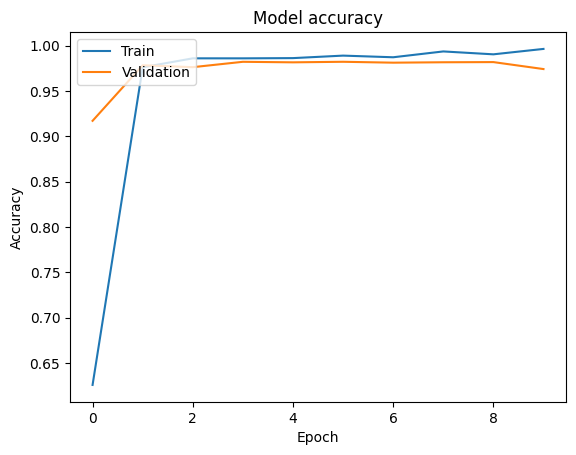

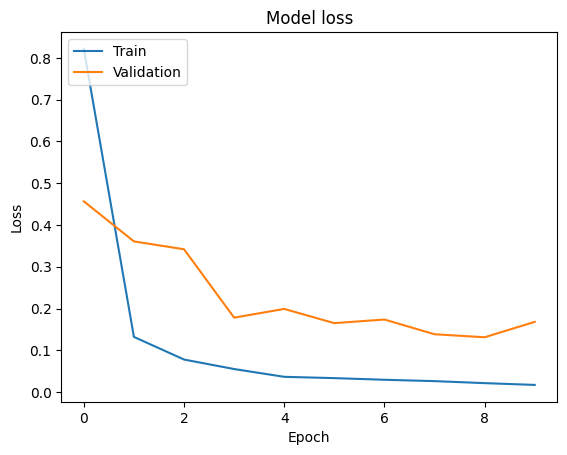

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import numpy as np

# Flatten the train_labels_sliced array to count occurrences of each label
flat_labels = train_labels_sliced.flatten()

# Count the occurrences of each unique label
unique_labels, label_counts = np.unique(flat_labels, return_counts=True)

# Print the counts for each unique label
for label, count in zip(unique_labels, label_counts):
    print("Label:", label, "Count:", count)


Label: 0 Count: 182657
Label: 1 Count: 2673
Label: 2 Count: 38


In [ ]:
import numpy as np

# Flatten the train_labels_sliced array to count occurrences of each label
flat_labels = test_labels_sliced.flatten()

# Count the occurrences of each unique label
unique_labels, label_counts = np.unique(flat_labels, return_counts=True)

# Print the counts for each unique label
for label, count in zip(unique_labels, label_counts):
    print("Label:", label, "Count:", count)

Label: 0 Count: 30310
Label: 1 Count: 256


In [ ]:
# Check if there are any occurrences of labels 0, 1, or 2 in the predicted_labels array
has_label_0 = np.sum(predicted_labels == 0)
has_label_1 = np.sum(predicted_labels == 1)
has_label_2 = np.sum(predicted_labels == 2)

# Print the results
print(f"Occurrences of label 0: {has_label_0}")
print(f"Occurrences of label 1: {has_label_1}")
print(f"Occurrences of label 2: {has_label_2}")


Occurrences of label 0: 30025
Occurrences of label 1: 541
Occurrences of label 2: 0


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Flatten the predicted and actual labels
pred_y_flat = np.argmax(predictions, axis=-1).ravel()
act_y_flat = test_labels_reshaped.argmax(axis=-1).ravel()

# Define classes
classes = [0, 1, 2]  # Assuming classes are 0, 1, 2

# Calculate confusion matrix
conf_matrix = confusion_matrix(act_y_flat, pred_y_flat, labels=classes)

# Calculate accuracy
accuracy = accuracy_score(act_y_flat, pred_y_flat)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(act_y_flat, pred_y_flat, average=None, labels=classes)
recall = recall_score(act_y_flat, pred_y_flat, average=None, labels=classes)
f1 = f1_score(act_y_flat, pred_y_flat, average=None, labels=classes)

# Print precision, recall, and F1-score for each class
for i, cls in enumerate(classes):
    print(f"Class {cls}:")
    print(f"  Precision: {precision[i]}")
    print(f"  Recall: {recall[i]}")
    print(f"  F1-score: {f1[i]}")



Confusion Matrix:
[[29944   366     0]
 [   81   175     0]
 [    0     0     0]]

Accuracy: 0.9853759078714912
Class 0:
  Precision: 0.9973022481265612
  Recall: 0.9879247773012207
  F1-score: 0.9925913648794232
Class 1:
  Precision: 0.3234750462107209
  Recall: 0.68359375
  F1-score: 0.4391468005018821
Class 2:
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


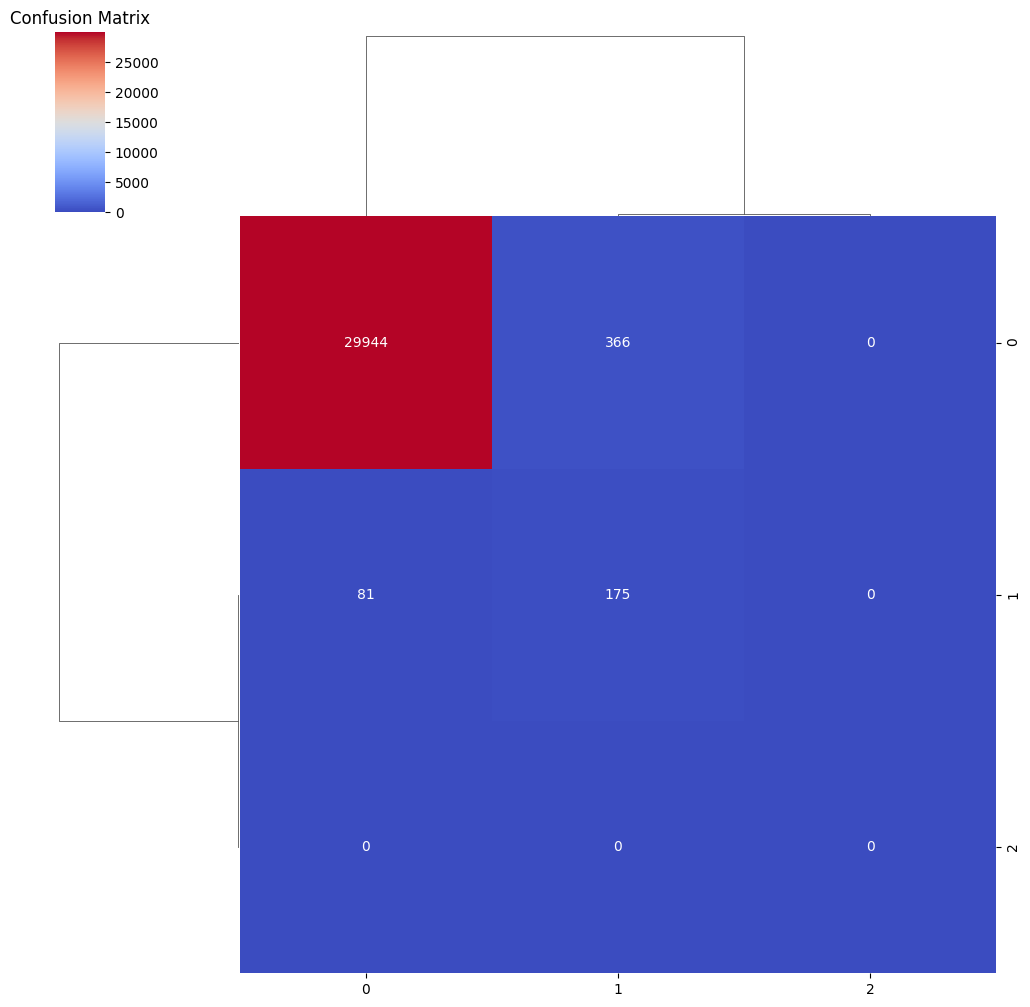

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a confusion matrix stored in 'conf_matrix'
sns.clustermap(conf_matrix, cmap='coolwarm', annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()



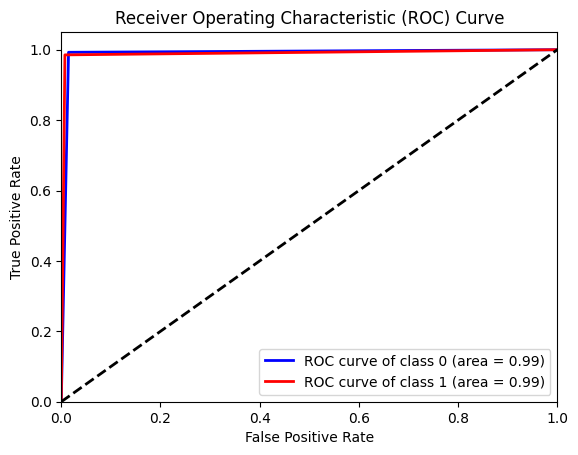

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(set(test_labels_sliced.ravel()))  # Assuming test_labels_sliced and predicted_labels_with_dim have the same classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((test_labels_reshaped.ravel() == i).astype(int),
                                  (predicted_labels_reshaped.ravel() == i).astype(int))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'yellow']  # Customize colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

# Reshape the input data into 2D format
n_samples = test_arrays_sliced.shape[0]
n_features = np.prod(test_arrays_sliced.shape[1:])
X_test_reshaped = test_arrays_sliced.reshape(n_samples, n_features)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test_reshaped, test_labels_reshaped, n_repeats=30, random_state=42)

# Get feature importances
feature_importances = perm_importance.importances_mean

# Print feature importance scores
for i, imp in enumerate(feature_importances):
    print(f"Feature {i+1}: {imp}")

# Plot feature importances
import matplotlib.pyplot as plt
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Permutation Importance')
plt.show()






TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.src.engine.sequential.Sequential object at 0x786955e20d30> does not.

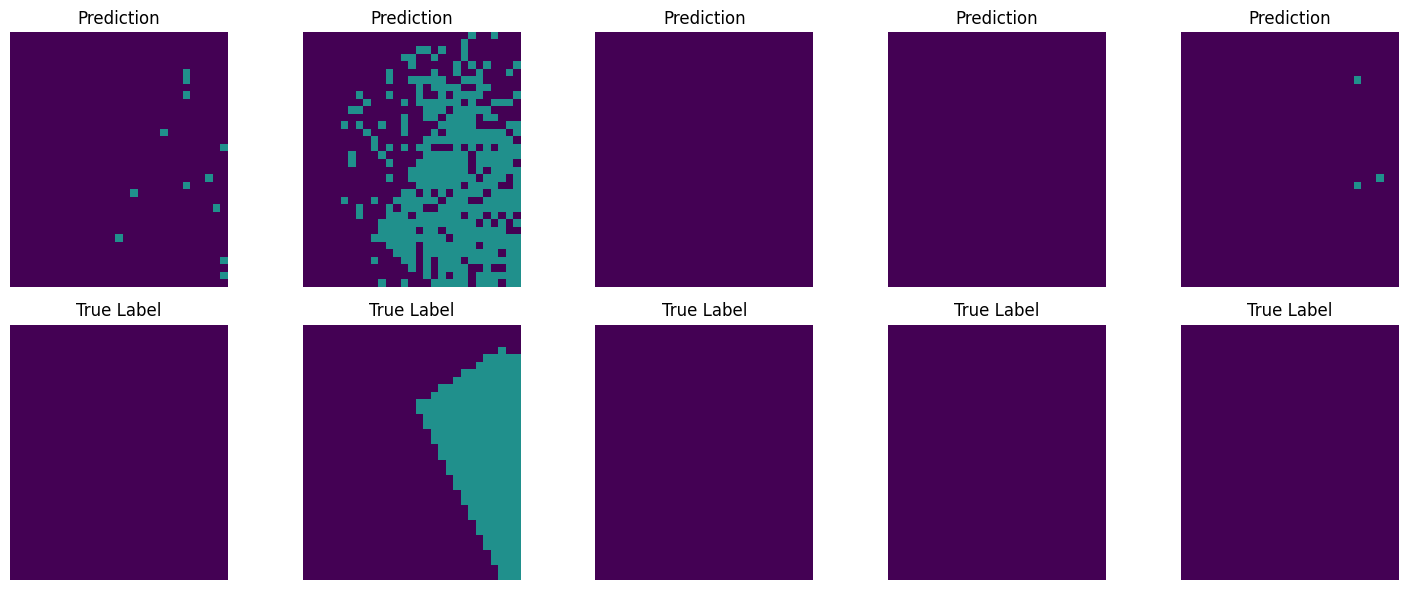

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions_with_class_1(predictions, test_labels, num_classes):
    # Choose 5 random indices for visualization
    indices = np.random.choice(len(predictions), 5, replace=True)

    # Define a colormap for better visualization
    cmap = plt.get_cmap('viridis', num_classes)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i, idx in enumerate(indices):
        # Get the predicted and true labels for the current index
        pred_label = predictions[idx]
        true_label = test_labels[idx]

        # Plot the predicted label
        axes[0, i].imshow(pred_label.argmax(axis=-1), cmap=cmap, vmin=0, vmax=num_classes-1)
        axes[0, i].set_title('Prediction')
        axes[0, i].axis('off')

        # Plot the true label
        true_label_image = axes[1, i].imshow(true_label.argmax(axis=-1), cmap=cmap, vmin=0, vmax=num_classes-1)
        axes[1, i].set_title('True Label')
        axes[1, i].axis('off')

        # Check if class 1 labels exist in the sampled region
        if np.any(true_label[..., 1]):
            true_label_image.set_clim(0, num_classes-1)

    plt.tight_layout()
    plt.show()

# Visualize predictions and corresponding test labels with class 1 labels
plot_predictions_with_class_1(predicted_labels_reshaped, test_labels_reshaped, num_classes)

